# Exploratory Data Analysis 

In [1]:
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import seaborn as sn 
import nltk 
import wordcloud 


In [2]:
df = pd.read_csv('data.csv')
print("The shape of data is : ",df.shape)
print("The data is ")
df.head(10)

The shape of data is :  (1244184, 2)
The data is 


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [4]:
df.nunique()

publish_date        6882
headline_text    1213004
dtype: int64

## Since the dataset is too large I would be looking at only 20,000 rows for creating better visualizations and analysis 

In [5]:
df=df.loc[0:20000]
df.head(10), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   20001 non-null  int64 
 1   headline_text  20001 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


(   publish_date                                      headline_text
 0      20030219  aba decides against community broadcasting lic...
 1      20030219     act fire witnesses must be aware of defamation
 2      20030219     a g calls for infrastructure protection summit
 3      20030219           air nz staff in aust strike for pay rise
 4      20030219      air nz strike to affect australian travellers
 5      20030219                  ambitious olsson wins triple jump
 6      20030219         antic delighted with record breaking barca
 7      20030219  aussie qualifier stosur wastes four memphis match
 8      20030219       aust addresses un security council over iraq
 9      20030219         australia is locked into war timetable opp,
 None)

### Analysing the word count, frequency, sentence length

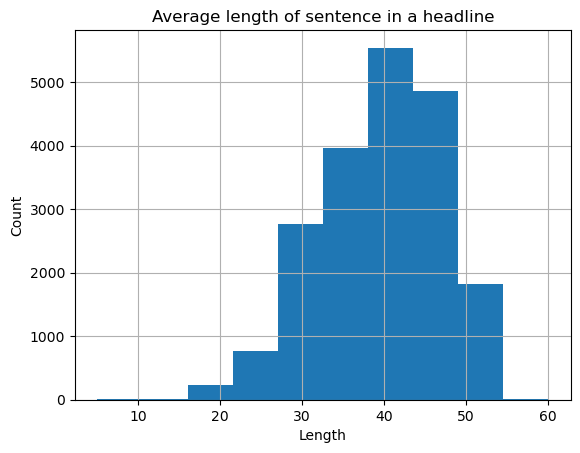

In [6]:
df['headline_text'].str.len().hist()
plt.grid(True)
plt.title("Average length of sentence in a headline")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

### The histogram shows that the news headlines reange from 10 to 70 but majorly lies between 25-55 

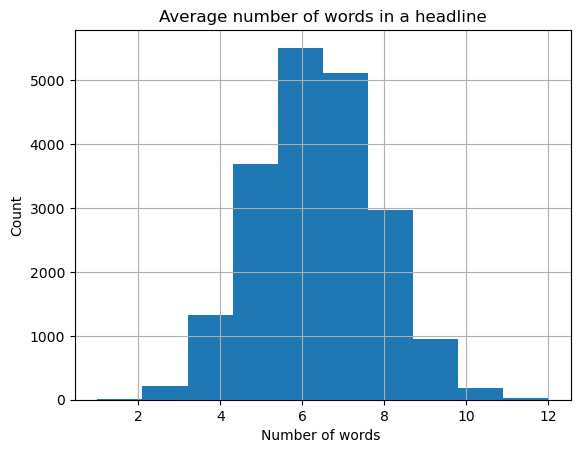

In [7]:
df["headline_text"].str.split().map(lambda x:len(x)).hist()
plt.grid(True)
plt.title("Average number of words in a headline")
plt.xlabel("Number of words ")
plt.ylabel("Count")
plt.show()

### This shows word count in headlines text average falls between 5 to 7

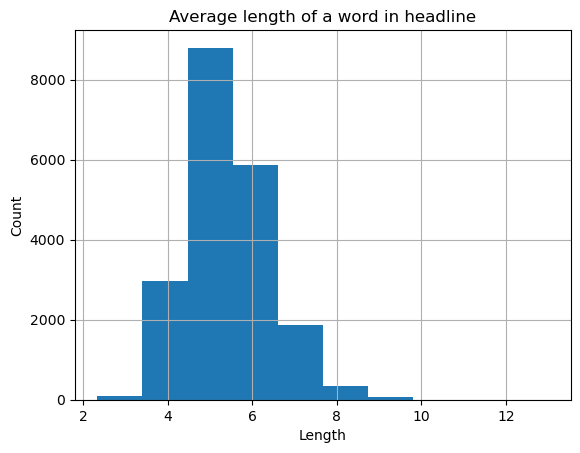

In [8]:
df["headline_text"].str.split().\
apply(lambda x: [len(i) for i in x]).\
map(lambda x: np.mean(x)).hist()
plt.grid(True)
plt.title("Average length of a word in headline")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

### The average Length of the word is between 4 to 7

It indicates that mostly short words are used in news headlines but it cannot be true and the reason for skewness can be due the use of stopwords like "the","a","an",etc.

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shirish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords 
stop=set(stopwords.words("english"))


In [11]:
# creating the corpus 
corpus=[]
new=df["headline_text"].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
corpus 

['aba',
 'decides',
 'against',
 'community',
 'broadcasting',
 'licence',
 'act',
 'fire',
 'witnesses',
 'must',
 'be',
 'aware',
 'of',
 'defamation',
 'a',
 'g',
 'calls',
 'for',
 'infrastructure',
 'protection',
 'summit',
 'air',
 'nz',
 'staff',
 'in',
 'aust',
 'strike',
 'for',
 'pay',
 'rise',
 'air',
 'nz',
 'strike',
 'to',
 'affect',
 'australian',
 'travellers',
 'ambitious',
 'olsson',
 'wins',
 'triple',
 'jump',
 'antic',
 'delighted',
 'with',
 'record',
 'breaking',
 'barca',
 'aussie',
 'qualifier',
 'stosur',
 'wastes',
 'four',
 'memphis',
 'match',
 'aust',
 'addresses',
 'un',
 'security',
 'council',
 'over',
 'iraq',
 'australia',
 'is',
 'locked',
 'into',
 'war',
 'timetable',
 'opp',
 'australia',
 'to',
 'contribute',
 '10',
 'million',
 'in',
 'aid',
 'to',
 'iraq',
 'barca',
 'take',
 'record',
 'as',
 'robson',
 'celebrates',
 'birthday',
 'in',
 'bathhouse',
 'plans',
 'move',
 'ahead',
 'big',
 'hopes',
 'for',
 'launceston',
 'cycling',
 'championsh

In [12]:
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

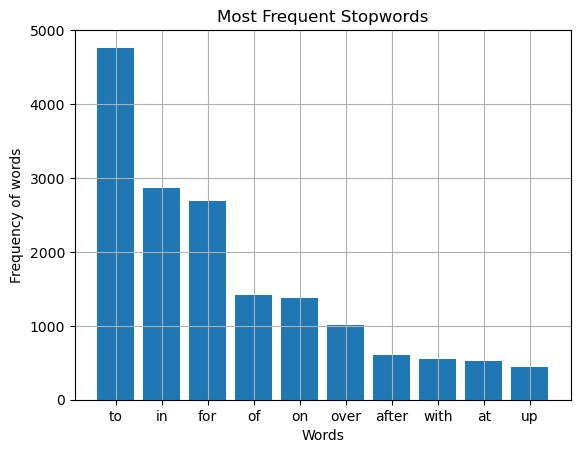

In [13]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.title("Most Frequent Stopwords")
plt.xlabel("Words")
plt.ylabel("Frequency of words")
plt.grid(True)
plt.bar(x,y)

### Now investigating which words other than stopwords are most frequent 

In [14]:
from collections import Counter 
counter=Counter(corpus)
most_used=counter.most_common()
x,y=[],[]
for word,count in most_used[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

<AxesSubplot:>

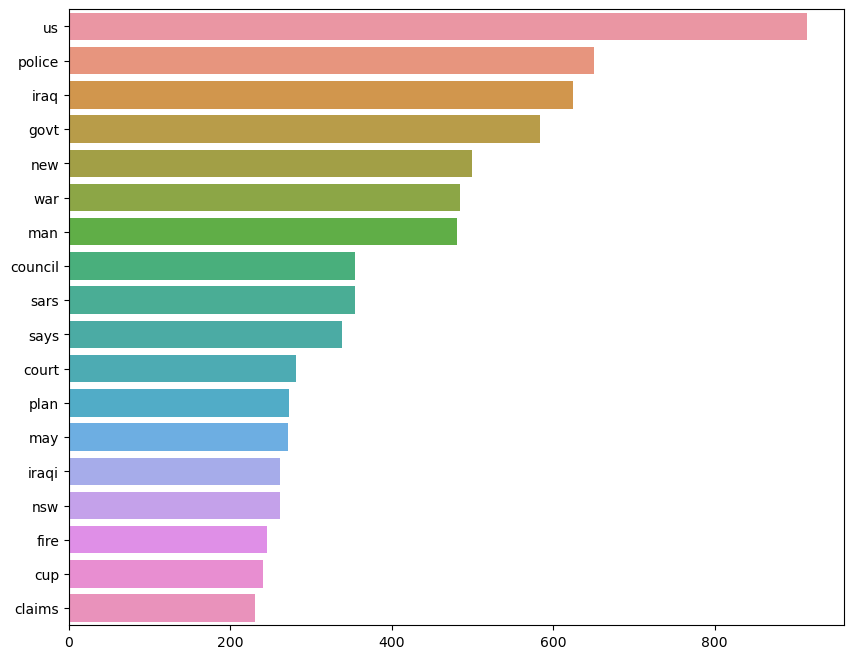

In [15]:
plt.figure(figsize=(10,8))
sn.barplot(x=y,y=x)


### It shows that the word Iraq dominates more hence the most of the news headlines must be related to iraq and its related issue, also, since the word war is also used quite frequently we can say that the issue can be related to iraq and war

# Ngram exploration 

### Using Ngram exploration can help us know in which context a very frequently used word was used. Ngram stands for contiguous sequences of n words used 


In [16]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
# it is used to convert a collection of text documents to a matrix of token counts

In [17]:
vec=CountVectorizer(ngram_range=(2,2)).fit(df["headline_text"])
bag_of_words=vec.transform(df["headline_text"])
sum_words=bag_of_words.sum(axis=0)
words_freq=[(word,sum_words[0,idx])for word,idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
subset_word_freq=words_freq[:10]

In [18]:
top_n_bigrams=subset_word_freq[:10]
x,y=map(list,zip(*top_n_bigrams))

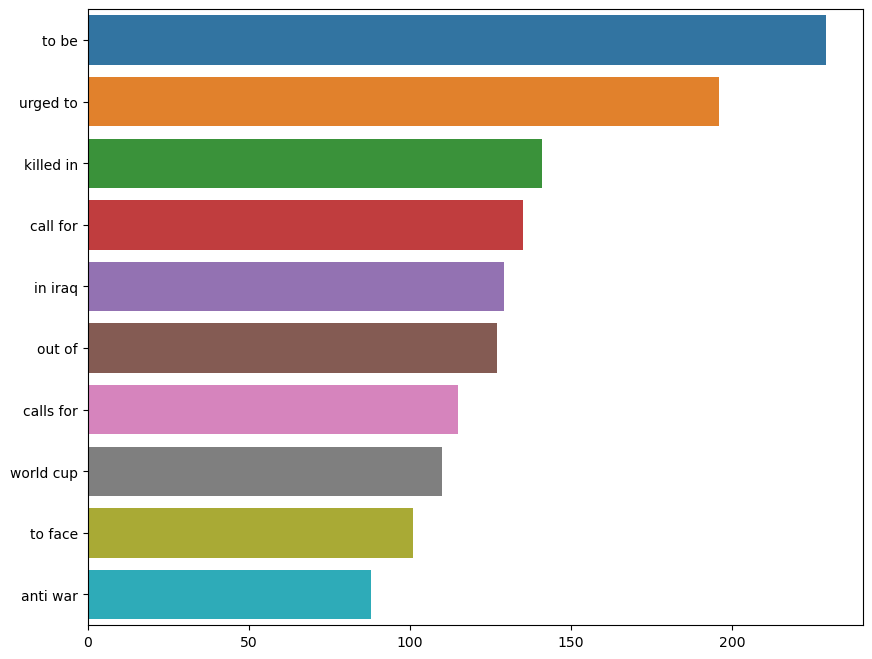

In [19]:
plt.figure(figsize=(10,8))
sn.barplot(x=y,y=x)
plt.show()

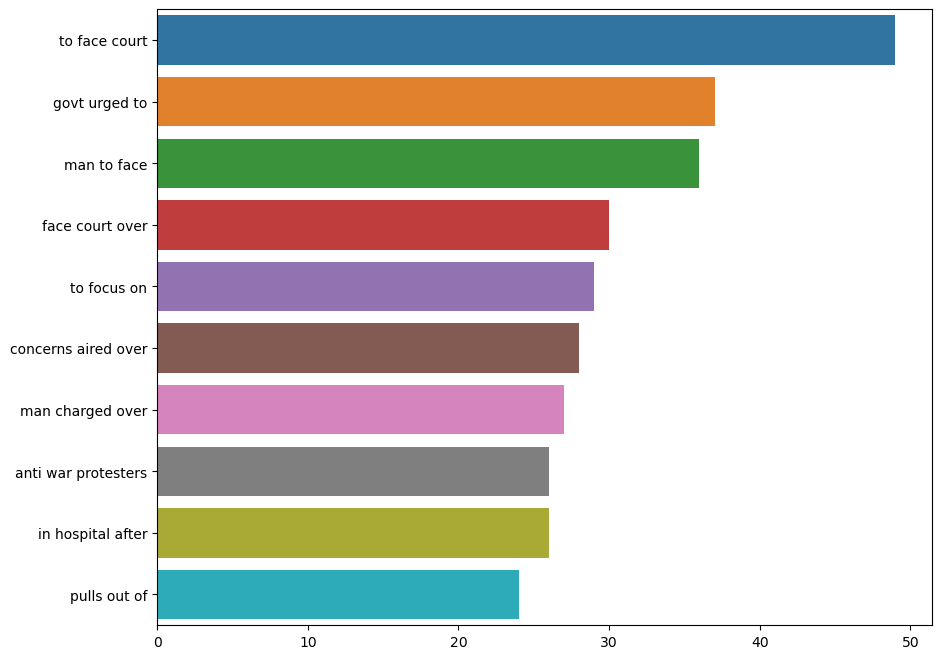

In [20]:
vec=CountVectorizer(ngram_range=(3,3)).fit(df["headline_text"])
bag_of_words=vec.transform(df["headline_text"])
sum_words=bag_of_words.sum(axis=0)
words_freq=[(word,sum_words[0,idx])for word,idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
subset_word_freq=words_freq[:10]
top_n_trigrams=subset_word_freq[:10]
x,y=map(list,zip(*top_n_trigrams))
plt.figure(figsize=(10,8))
sn.barplot(x=y,y=x)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shirish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


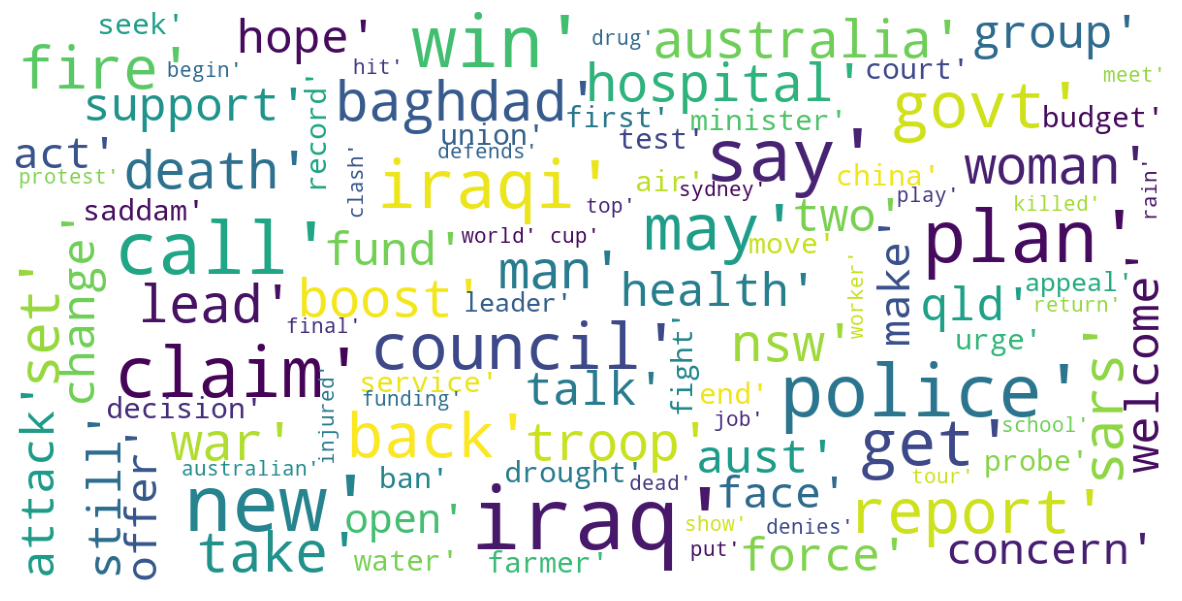

In [21]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(df["headline_text"])